In [753]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings("ignore")

from math import ceil
import numpy as np
import pandas as pd
import scipy.stats as stats

import altair as alt

import statsmodels.api as sm
import statsmodels.robust

from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


import seaborn as sns
import glm
# from glm.glm import GLM
# from glm.families import Gaussian

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')



from itertools import combinations

import math

In [754]:
#mvp_data = pd.read_csv('df_all_transactions.csv')
mvp_data = pd.read_csv('../data/eng_MVP_data.csv')

mvp_data= mvp_data.drop(mvp_data.columns[[0]], axis=1) 
mvp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38866 entries, 0 to 38865
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           38866 non-null  object
 1   brand           38854 non-null  object
 2   condition       38866 non-null  object
 3   categories      38866 non-null  object
 4   price           38866 non-null  object
 5   pickups         38866 non-null  object
 6   type            38866 non-null  object
 7   model           38866 non-null  object
 8   finish          38810 non-null  object
 9   origin          38866 non-null  object
 10  year            38858 non-null  object
 11  top             38866 non-null  object
 12  handed          38866 non-null  object
 13  neck            38866 non-null  object
 14  product_group   38866 non-null  object
 15  body_type       38866 non-null  object
 16  body_material   38866 non-null  object
 17  frets           38866 non-null  int64 
 18  availa

In [755]:
mvp_data.head()

,title,brand,condition,categories,price,pickups,type,model,finish,origin,year,top,handed,neck,product_group,body_type,body_material,frets,available_sale
0,Greco Single Cut LG-70 2002 Gold Single Cut,Greco,Used – Very Good,Solid Body,780,custom,unknown,Single Cut LG-70,Gold,Japan,2002,unknown,Right Handed,generic,generic,generic,unknown,22,1
1,Charvel 650XL Custom Metallic Black 1989,Charvel,Used – Good,unknown,"1,210.82",custom,unknown,650XL Custom Metallic Black,unknown,Japan,1989,unknown,Right Handed,generic,generic,generic,unknown,22,1
2,Ibanez Rg-1570 2006 Midnight Blue Sparkle,Ibanez,Used – Excellent,Solid Body,"1,050",custom,unknown,Rg-1570,Midnight Blue Sparkle,Japan,2006,unknown,Right Handed,generic,generic,generic,unknown,22,1
3,Vintage 1996 Ibanex RX240 AB electric guitar ...,Ibanez,Used – Very Good,Solid Body,349,custom,unknown,RX240 AB,Artic Blue,"Korea, Republic of",1996,unknown,Right Handed,generic,generic,Solid Body,unknown,22,1
4,Hamer Archtop Tremolo Flame Top Dark Cherry & ...,Hamer,Used – Mint,Solid Body,"1,001.05",custom,unknown,Archtop Tremolo Flame Top Dark Cherry & Padded...,Dark Cherry,Asia,unknown,unknown,Right Handed,generic,generic,Solid Body,unknown,22,1


## Data Cleaning Tasks:
- encode brand
- extract type from categories
- encode origin
- encode condition

In [756]:
brands = {
       'Airline':    'Airline',
       'Alvarez':    'Alvarez',
       'American Showster':    'American Showster',
       'Ampeg':    'Ampeg',
       'Aria':    'Aria',
       'B.C. Rich':    'B.C. Rich',
       'B3':    'B3',
       'BC Rich':    'BC Rich',
       'Baldwin':    'Baldwin',
       'Bilt':    'Bilt',
       'Bogner':    'Bogner',
       'Burns':    'Burns',
       'Campbell':    'Campbell',
       'Charvel':    'Charvel',
       'Collings':    'Collings',
       'Conrad':    'Conrad',
       'Cort':    'Cort',
       "D'Angelico":    "D'Angelico",
       'Danelectro':    'Danelectro',
       'DeArmond':    'DeArmond',
       'Dean':    'Dean',
       'DiPinto':    'DiPinto',
       'Dobro':    'Dobro',
       'Duesenberg':    'Duesenberg',
       'EKO':    'EKO',
       'ESP':    'ESP',
       'EVH':    'EVH',
       'Eastman':    'Eastman',
       'Eastwood':    'Eastwood',
       'Electra':    'Electra',
       'Epiphone':    'Epiphone',
       'Ernie Ball Music Man':    'Ernie Ball Music Man',
       'Fano':    'Fano',
       'Fender':    'Fender',
       'FENDER':    'Fender',        
       'Framus':    'Framus',
       'G&L':    'G&L',
       'Gagliano':    'Gagliano',
       'Gibson':    'Gibson',
       'GIBSON':    'Gibson',
       'Giffin':    'Giffin',
       'Godin':    'Godin',
       'Goya':    'Goya',
       'Gretsch':    'Gretsch',
       'Grosh':    'Grosh',
       'Guild':    'Guild',
       'Guyatone':    'Guyatone',
       'Hagstrom':    'Hagstrom',
       'Hamer':    'Hamer',
       'Harden Engineering':    'Harden Engineering',
       'Harmony':    'Harmony',
       'Heritage':    'Heritage',
       'Harley Benton':    'Harley Benton',
       'Höfner':    'Höfner',
       'Hohner':    'Höfner',
       'Ibanez':    'Ibanez',
       'Intermark':    'Intermark',
       'Jackson':    'Jackson',
       'James Trussart':    'James Trussart',
       'Jerry Jones':    'Jerry Jones',
       'Kalamazoo':    'Kalamazoo',
       'Kay':    'Kay',
       'Kimberly':    'Kimberly',
       'Kramer':    'Kramer',
       'LTD':    'ESP',        
       'La Baye':    'La Baye',
       'Larrivee':    'Larrivee',
       'Line 6':    'Line 6',
       'MCI':    'MCI',
       'Michael Kelly':'Michael Kelly',
       'Magnatone':    'Magnatone',
       'Martin':    'Martin',
       'Memphis':    'Memphis',
       'Micro-Frets':    'Micro-Frets',
       'Moog':    'Moog',
       'Mosrite':    'Mosrite',
       'Music Man':    'Music Man',
       'Musicraft':    'Musicraft',
       'Musicvox':    'Musicvox',
       'Nash':    'Nash',
       'National':    'National',
       'Norma':    'Norma',
       'Orville':    'Orville',
       'Ovation':    'Ovation',
       'Parker':    'Parker',
       'PRS':    'PRS',
       'Peavey':    'Peavey',
       'Premier':    'Premier',
       'Reverend':    'Reverend',
       'Rickenbacker':    'Rickenbacker',
       'Roland':    'Roland',
       'SWR':    'SWR',
       'Schecter':    'Schecter',
       'Silvertone':    'Silvertone',
       'Sorrento':    'Sorrento',
       'Squier':    'Squier',
       'Steinberger':    'Steinberger',
       'Suhr':    'Suhr',
       'Supro':    'Supro',
       'Strandberg':    'Strandberg',
       'Traveler':    'Traveler',        
       'Taylor':    'Taylor',
       'Teisco':    'Teisco',
       'The Loar':    'The Loar',
       'Tokai':    'Tokai',
       'Tom Anderson':    'Tom Anderson',
       'Travis':    'Travis',
       'Truetone':    'Truetone',
       'Two Rock':    'Two Rock',
       'Univox':    'Univox',
       'Vox':    'Vox',
       'Washburn':    'Washburn',
       'Warmoth':    'Warmoth',
       'Woodrow':    'Woodrow', 
       'Yamaha':    'Yamaha'   }

def clean_name(df):
    pattern = '|'.join(brands)
    df['state'] = df.title.str.contains(pattern)
    
    
    

def extractbrands(df):
    brands = {
           'Airline':    'Airline',
           'Alvarez':    'Alvarez',
           'American Showster':    'American Showster',
           'Ampeg':    'Ampeg',
           'Aria':    'Aria',
           'B.C. Rich':    'B.C. Rich',
           'B3':    'B3',
           'BC Rich':    'BC Rich',
           'Baldwin':    'Baldwin',
           'Bilt':    'Bilt',
           'Bogner':    'Bogner',
           'Burns':    'Burns',
           'Campbell':    'Campbell',
           'Charvel':    'Charvel',
           'Collings':    'Collings',
           'Conrad':    'Conrad',
           'Cort':    'Cort',
           "D'Angelico":    "D'Angelico",
           'Danelectro':    'Danelectro',
           'DeArmond':    'DeArmond',
           'Dean':    'Dean',
           'DiPinto':    'DiPinto',
           'Dobro':    'Dobro',
           'Duesenberg':    'Duesenberg',
           'EKO':    'EKO',
           'ESP':    'ESP',
           'EVH':    'EVH',
           'Eastman':    'Eastman',
           'Eastwood':    'Eastwood',
           'Electra':    'Electra',
           'Epiphone':    'Epiphone',
           'Ernie Ball Music Man':    'Ernie Ball Music Man',
           'Fano':    'Fano',
           'Fender':    'Fender',
           'FENDER':    'Fender',        
           'Framus':    'Framus',
           'G&L':    'G&L',
           'Gagliano':    'Gagliano',
           'Gibson':    'Gibson',
           'GIBSON':    'Gibson',
           'Giffin':    'Giffin',
           'Godin':    'Godin',
           'Goya':    'Goya',
           'Gretsch':    'Gretsch',
           'Grosh':    'Grosh',
           'Guild':    'Guild',
           'Guyatone':    'Guyatone',
           'Hagstrom':    'Hagstrom',
           'Hamer':    'Hamer',
           'Harden Engineering':    'Harden Engineering',
           'Harmony':    'Harmony',
           'Heritage':    'Heritage',
           'Harley Benton':    'Harley Benton',
           'Höfner':    'Höfner',
           'Hohner':    'Höfner',
           'Ibanez':    'Ibanez',
           'Intermark':    'Intermark',
           'Jackson':    'Jackson',
           'James Trussart':    'James Trussart',
           'Jerry Jones':    'Jerry Jones',
           'Kalamazoo':    'Kalamazoo',
           'Kay':    'Kay',
           'Kimberly':    'Kimberly',
           'Kramer':    'Kramer',
           'LTD':    'ESP',        
           'La Baye':    'La Baye',
           'Larrivee':    'Larrivee',
           'Line 6':    'Line 6',
           'MCI':    'MCI',
           'Michael Kelly':'Michael Kelly',
           'Magnatone':    'Magnatone',
           'Martin':    'Martin',
           'Memphis':    'Memphis',
           'Micro-Frets':    'Micro-Frets',
           'Moog':    'Moog',
           'Mosrite':    'Mosrite',
           'Music Man':    'Music Man',
           'Musicraft':    'Musicraft',
           'Musicvox':    'Musicvox',
           'Nash':    'Nash',
           'National':    'National',
           'Norma':    'Norma',
           'Orville':    'Orville',
           'Ovation':    'Ovation',
           'Parker':    'Parker',
           'PRS':    'PRS',
           'Peavey':    'Peavey',
           'Premier':    'Premier',
           'Reverend':    'Reverend',
           'Rickenbacker':    'Rickenbacker',
           'Roland':    'Roland',
           'SWR':    'SWR',
           'Schecter':    'Schecter',
           'Silvertone':    'Silvertone',
           'Sorrento':    'Sorrento',
           'Squier':    'Squier',
           'Steinberger':    'Steinberger',
           'Suhr':    'Suhr',
           'Supro':    'Supro',
           'Strandberg':    'Strandberg',
           'Traveler':    'Traveler',        
           'Taylor':    'Taylor',
           'Teisco':    'Teisco',
           'The Loar':    'The Loar',
           'Tokai':    'Tokai',
           'Tom Anderson':    'Tom Anderson',
           'Travis':    'Travis',
           'Truetone':    'Truetone',
           'Two Rock':    'Two Rock',
           'Univox':    'Univox',
           'Vox':    'Vox',
           'Washburn':    'Washburn',
           'Warmoth':    'Warmoth',
           'Woodrow':    'Woodrow', 
           'Yamaha':    'Yamaha'   }    
        
        
    df['guitar_brand'] = (
        df.title
          .str.replace('Paul Reed Smith','PRS')
          .str.extract('(' + '|'.join(brands.keys()) + ')')
          .squeeze().map(brands)
    )
    
def extractmodel(df):
    model_dict = {
        '173':'173',
        '330':'330',
        '1454 Archtop':'1454 Archtop',
        'Artcore AGS73T':'Artcore AGS73T',
        'AT-200':'AT-200',
        'AT100CL-SB':'AT100CL-SB',
        'At':'AT Series',
        'Ag':'AG Series',
        'Ax':'AX Series',
        'AG':'AG Series',
        'AT':'AT Series',
        'AZ':'AZ',
        'Bird of Prey': 'Bird of Prey',
        'Boden':'Boden',
        'Brad Paisley Esquire':'Brad Paisley Esquire',
        'C-1':'C-1',
        'C-7':'C-7',
        'Casino':'Casino',
        'Classic 1478':'Classic 1478',
        'Conqueror / Teisco / Matsumoku':'special',
        'Teisco / Kingston / Matsumoku "Surfcaster" ':'Surfcaster',
        'Classic 1423':'Classic 1423',
        'Cutlas':'Cutlas',
        'Contender':'Contender',
        'Coronado':'Coronado',
        'Cyclone':'Cyclone',
        'Dana':'Dana',
        'DELUXE DC LE':'DELUXE DC LE',
        "D'Angelico Deluxe SS":'DELUXE SS LE',
        'Deluxe Bedford':'Deluxe Bedford',
        'Dead-On':'Dead-On',
        'Dean V':'V',
        'Diablo':'Diablo',
        'Double Cat': 'Double Cat',
        "D'Angelico 6 String Semi-Hollow-Body":'HB',
        'G&L USA Doheny Hardtail':'Doheny Hardtail',
        'EC1000ETFM':'EC1000ETFM',
        'Epiphone SG Standard':'SG Standard',
        'Epiphone SG Classic':'SG Classic',
        'Epiphone SG Traditional':'SG Traditional',
        'Epiphone SG':'SG',
        'ES-325':'ES-325',
        'ES-339':'ES-339',
        'ESP LTD Snakebyte':'Snakebyte',
        'EG-1':'EG-1',
        'Fender Ben Gibbard Mustang':'Mustang',
        'ESP USA M-I':'M-I',
        'GPS':'GPS',
        'G5410T':'G5410T',
        'Guyatone Zenon Teisco':'generic/clone',
        'G6129T':'G6129T',
        'GRX70QA':'GRX70QA',
        'Gristlemaste':'Gristlemaster',
        'Electromatic':'Electromatic',
        'T486-GB':'T486-GB',
        'Falcon':'Falcon',
        'Harley Benton CST':'CST',
        'Harmony Marquis':'Marquis',
        'H78':'H78',
        'HT7':'HT7',
        'H-1001':'H-1001',
        'H-1001FR':'H-1001FR',
        'Horizon':'Horizon',
        'Idolmaker':'Idolmaker',
        'Impact 2':'Impact 2',
        'Jaguar':'Jaguar',
        'JAG':'Jaguar',
        'JAGUAR':'Jaguar',
        'Jazzmaster':'Jazzmaster',
        'Jersey Star':'Jersey Star',
        'Joe Satriani':'Joe Satriani',
        'John Petrucci Majesty':'Majesty',
        'JS Series Dinky™':'JS Dinky',
        'Kirk Hammett Signature':'Kirk Hammett Signature',
        'LP':'Les Paul',
        'LG':'LG',
        'Les Paul Standard':'Les Paul Standard',
        'Les Paul Classic':'Les Paul Classic',
        'Les Paul Studio':'Les Paul Studio',
        'Les Paul Tribute':'Les Paul Tribute',
        'Les Paul Custom':'Les Paul Custom',
        'Les Paul Special':'Les Paul Special',
        'Les Paul Junior':'Les Paul Junior',
        'Les Paul Traditional':'Les Paul Traditional',
        'LH-309':'LH-309',
        'LH-304T':'LH-304T',
        'Mod-X':'Mod-X',
        'M-I':'M-I',
        'M-200':'M-200',
        'MH200':'MH200',
        'Michael Kelly Mod Shop':'Mod Shop',
        'Michael Kelly Forte':'Forte', 
        'Michael Kelly Mod 55':'Mod Shop 55',
        'Mod Shop 50':'Mod Shop 50',
        'Mockingbird':'Mockingbird',
        'Monarkh':'Monarkh',
        'Omen':'Omen',
        'Parker Fly':'Fly',
        'Panthera Supreme':'Panthera Supreme',
        'Player Mustang':'Player Mustang',
        'Player Stratocaster':'Player Stratocaster',
        'Player Telecaster':'Player Telecaster',
        'Player Jaguar':'Player Jaguar',
        'Player Jazzmaster':'Player Jazzmaster',
        'PRS SE':'SE',
        'PRS S2':'S2',
        'PRS Custom 24':'PRS Custom 24',
        'PRS McCarty SC594':'McCarty SC594',
        'Reverse Explorer':'Reverse Explorer',
        'RX':'RX Series',
        'RG':'RG Series',
        'Rg':'RG Series',
        'San Dimas Style 1':'San Dimas Style 1',
        'SG Standard':'SG Standard',
        'SG Classic':'SG Classic',
        'SG Traditional':'SG Traditional',
        'SG Junior':'SG Junior',
        'Trad Pro':'Trad Pro',
        'SA-500':'SA-500',
        'S-63':'S-63',
        'Special 22':'Special 22',
        'strat':'Stratocaster',
        'Strat':'Stratocaster',
        'STRATOCASTER':'Stratocaster',
        'Sheraton II':'Sheraton II',
        'Sheraton':'Sheraton',
        'Schecter Sun Valley':'Sun Valley',
        'Stingray':'Stingray',
        'Schecter 3327':'3327',
        'Streamliner':'Streamliner',
        'Soloist':'Soloist',
        'So-Cal Style 2':'So-Cal Style 2',
        'Suhr Standard':'Suhr Standard',
        'Tele':'Telecaster',
        'tele':'Telecaster',
        'T486B':'T486B',
        'Artist 2618':'Artist 2618',
        'ES-335': 'ES-335',
        'EC-1000':'EC-1000',
        'ET-200':'ET-200',
        'EXL-1':'EXL-1',
        'Northender':'Northender',
        'RG':'RG',
        'Silver Sky':'Silver Sky',
        'Tom Quayle Signature':'TQM',
        'Valentine':'Valentine',
        'Wolfgang Special':'Wolfgang Special',
        'Wood Library Custom 24':'Wood Library Custom 24',
        'Wildkat':'Wildkat',
        'X Series':'X Series'
    
    }
    df['guitar_model'] = (
        df.title
          .str.extract('(' + '|'.join(model_dict.keys()) + ')')
          .squeeze().map(model_dict)
    )
        
        
    

def clean_text(title):
        title = title.replace('(Mostly Loaded) Must See!','')
        title = title.replace('Pre-owned','')
        title = title.replace('Paul Reed Smith','PRS')
        title = title.replace('In Stock!','')
        title = title.replace('AUTUMN OFFLOAD// RARE ','')
        
        
         
       
        return title

def clean_price(txt):
    txt = txt.replace('$','')
    txt = txt.replace(',','')
    #txt = "{:.2f}".format(float(txt))
    #txt = float(txt)
    return float(txt)

    



def extractyear(title):
    pass

In [757]:
mvp_data.columns

Index(['title', 'brand', 'condition', 'categories', 'price', 'pickups', 'type',
       'model', 'finish', 'origin', 'year', 'top', 'handed', 'neck',
       'product_group', 'body_type', 'body_material', 'frets',
       'available_sale'],
      dtype='object')

In [758]:
#mvp_data['price'] = mvp_data.price.apply(clean_price)

extractbrands(mvp_data)
extractmodel(mvp_data)

In [759]:
clean_name(mvp_data)

In [760]:
mvp_data.state.value_counts()

True     30908
False     7958
Name: state, dtype: int64

In [761]:
mvp_data[mvp_data.state==False][['title','guitar_brand','origin','model','categories','condition','price']]

,title,guitar_brand,origin,model,categories,condition,price
0,Greco Single Cut LG-70 2002 Gold Single Cut,NaN,Japan,Single Cut LG-70,Solid Body,Used – Very Good,780
3,Vintage 1996 Ibanex RX240 AB electric guitar ...,NaN,"Korea, Republic of",RX240 AB,Solid Body,Used – Very Good,349
28,Carvin Bolt HSS Matte,NaN,United States,Bolt HSS,Solid Body,Used – Very Good,700
31,Greco Apollo AG650 Japan 2002,NaN,Japan,AG650,unknown,Used – Excellent,450
33,Paul Reed Smith Silver Sky,PRS,United States,Silver Sky John Mayer Signature with Rosewood ...,Solid Body,Used – Mint,"2,000"
...,...,...,...,...,...,...,...
38853,Paul Reed Smith McCarty 594 Wood Library Limit...,PRS,United States,McCarty 594 Wood Library,Solid Body,Used – Mint,"4,800"
38859,Custom Telecaster White,NaN,Asia,Telecaster,Solid Body,Used – Very Good,499
38862,Domino Californian 1960’s (Used),NaN,Japan,Californian 1960’s (Used),unknown,Used – Fair,673.97
38863,2019 Paul Reed Smith S2 Starla McCarty Tobacco...,PRS,United States,S2 Starla with Dots Inlay,Solid Body,Used – Excellent,930


In [762]:
model_df = mvp_data[mvp_data.state==True][['title','guitar_brand','brand','guitar_model','model','origin','categories','condition','price']]
model_df['guitar_model'] = model_df['guitar_model'].replace({ np.nan:'Other'})
model_df.head()

,title,guitar_brand,brand,guitar_model,model,origin,categories,condition,price
1,Charvel 650XL Custom Metallic Black 1989,Charvel,Charvel,Other,650XL Custom Metallic Black,Japan,unknown,Used – Good,"1,210.82"
2,Ibanez Rg-1570 2006 Midnight Blue Sparkle,Ibanez,Ibanez,RG Series,Rg-1570,Japan,Solid Body,Used – Excellent,"1,050"
4,Hamer Archtop Tremolo Flame Top Dark Cherry & ...,Hamer,Hamer,Other,Archtop Tremolo Flame Top Dark Cherry & Padded...,Asia,Solid Body,Used – Mint,"1,001.05"
5,ESP Horizon NT-7 2014,ESP,ESP,Horizon,Horizon NT-7,Japan,Solid Body,Used – Mint,"2,100"
6,Fender Blacktop Telecaster 2010 MIM HH Inca Si...,Fender,Fender,Telecaster,Blacktop Telecaster HH with Rosewood Fretboard,Mexico,Solid Body,Used – Very Good,849


## Start prepping data for model

In [763]:
testdf = model_df.copy()
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30908 entries, 1 to 38864
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         30908 non-null  object
 1   guitar_brand  30908 non-null  object
 2   brand         30908 non-null  object
 3   guitar_model  30908 non-null  object
 4   model         30908 non-null  object
 5   origin        30908 non-null  object
 6   categories    30908 non-null  object
 7   condition     30908 non-null  object
 8   price         30908 non-null  object
dtypes: object(9)
memory usage: 2.4+ MB


In [764]:
## clean price
testdf['price'] = testdf['price'].str.replace(',','')
testdf['price'] = pd.to_numeric(testdf["price"])
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30908 entries, 1 to 38864
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         30908 non-null  object 
 1   guitar_brand  30908 non-null  object 
 2   brand         30908 non-null  object 
 3   guitar_model  30908 non-null  object 
 4   model         30908 non-null  object 
 5   origin        30908 non-null  object 
 6   categories    30908 non-null  object 
 7   condition     30908 non-null  object 
 8   price         30908 non-null  float64
dtypes: float64(1), object(8)
memory usage: 2.4+ MB


In [765]:
# encode Condition
def reduce_condition(df):
    conditions = [df.condition.str.contains('Mint'), 
                  df.condition.str.contains('Excellent'),
                  df.condition.str.contains('Very Good'),
                  df.condition.str.contains('Good'),
                  df.condition.str.contains('Fair'),
                  df.condition.str.contains('Poor')
                 ]
    
    values = ['Mint','Excellent','Very Good','Good','Fair','Poor']
    df['condition'] = np.select(conditions, values)
    
def encode_condition(df):
    conditions = [df.condition.str.contains('Mint'), 
                  df.condition.str.contains('Excellent'),
                  df.condition.str.contains('Very Good'),
                  df.condition.str.contains('Good'),
                  df.condition.str.contains('Fair'),
                  df.condition.str.contains('Poor')
                 ]
    
    values = [6,5,4,3,2,1]
    df['cond_score'] = np.select(conditions, values)
    

In [767]:
## sanity check using testdf
reduce_condition(testdf)
encode_condition(testdf)
testdf.head()

,title,guitar_brand,brand,guitar_model,model,origin,categories,condition,price,cond_score
1,Charvel 650XL Custom Metallic Black 1989,Charvel,Charvel,Other,650XL Custom Metallic Black,Japan,unknown,Good,"1,210.82",3
2,Ibanez Rg-1570 2006 Midnight Blue Sparkle,Ibanez,Ibanez,RG Series,Rg-1570,Japan,Solid Body,Excellent,"1,050.00",5
4,Hamer Archtop Tremolo Flame Top Dark Cherry & ...,Hamer,Hamer,Other,Archtop Tremolo Flame Top Dark Cherry & Padded...,Asia,Solid Body,Mint,"1,001.05",6
5,ESP Horizon NT-7 2014,ESP,ESP,Horizon,Horizon NT-7,Japan,Solid Body,Mint,"2,100.00",6
6,Fender Blacktop Telecaster 2010 MIM HH Inca Si...,Fender,Fender,Telecaster,Blacktop Telecaster HH with Rosewood Fretboard,Mexico,Solid Body,Very Good,849.00,4


In [257]:
encode_condition(model_df)

## Examine categories as a way to extract type as feature

In [768]:
testdf.categories.value_counts()

Solid Body                     22924
Semi-Hollow                     2134
unknown                         1906
Hollow Body                     1268
Solid Body Electric Guitars     1134
                               ...  
5- and 6-String Basses             1
Knobs                              1
ArchtopSolid Body                  1
12-StringSemi-Hollow               1
Guitar Necks                       1
Name: categories, Length: 63, dtype: int64

In [769]:
# feature engineer type

def extract_type(df):
    types_dict = {
        'Solid Body':'Solid Body',
        'Semi-Hollow':'Semi-Hollow',
        'Hollow Body':'Hollow Body',
        'unknown':'Other'        
    }
    df['type'] = (
        df.categories
          .str.extract('(' + '|'.join(types_dict.keys()) + ')')
          .squeeze().map(types_dict)
    )
def encode_type(df):
    conditions = [df.type=='Solid Body',
                  df.type=='Semi-Hollow',
                  df.type=='Hollow Body',
                  df.type=='Other'
                 ]
    
    values = [1,2,3,4]
    df['type_code'] = np.select(conditions, values)
    

## Extract Type from categories

In [770]:
extract_type(testdf)
testdf['type'] = testdf['type'].replace({ np.nan:'Other'})
testdf.head(1)

,title,guitar_brand,brand,guitar_model,model,origin,categories,condition,price,cond_score,type
1,Charvel 650XL Custom Metallic Black 1989,Charvel,Charvel,Other,650XL Custom Metallic Black,Japan,unknown,Good,"1,210.82",3,Other


## numerically encode type

In [260]:

encode_type(testdf)
testdf.type_code.value_counts()

1    24519
2     2415
4     2291
3     1683
Name: type_code, dtype: int64

In [771]:
testdf.categories.value_counts()

Solid Body                     22924
Semi-Hollow                     2134
unknown                         1906
Hollow Body                     1268
Solid Body Electric Guitars     1134
                               ...  
5- and 6-String Basses             1
Knobs                              1
ArchtopSolid Body                  1
12-StringSemi-Hollow               1
Guitar Necks                       1
Name: categories, Length: 63, dtype: int64

## encoding brand

In [772]:
testdf.brand.nunique()

352

In [773]:
testdf.describe()

,price,cond_score
count,"30,908.00","30,908.00"
mean,"2,247.14",4.46
std,"5,310.30",1.19
min,6.05,0.00
25%,699.77,4.00
50%,"1,200.00",5.00
75%,"2,362.05",5.00
max,"250,000.00",6.00


In [264]:
testdf[testdf.price>10000]

,title,guitar_brand,brand,guitar_model,model,origin,categories,condition,price,cond_score,type,type_code
132,Fender 35th Anniv. Mustang Stratocaster 23/35...,Fender,Fender,Stratocaster,35th Anniv. Mustang Stratocaster 23/35,United States,unknown,Used – Excellent,24995.00,5,Other,4
240,Gibson 1964 SG Special Vibrola,Gibson,Gibson,Other,SG Special with Vibrola,Asia,Solid Body,Used – Very Good,10495.00,4,Solid Body,1
248,Gibson 1952 Les Paul Standard,Gibson,Gibson,Les Paul Standard,Les Paul with Trapeze Tailpiece,Asia,Solid Body,Used – Very Good,41950.00,4,Solid Body,1
304,1958 / 1963 Gibson EMS-1235 Double Mandolin do...,Gibson,Gibson,Other,EMS-1235 Double Neck Guitar / Mandolin,United States,Hollow Body,Used – Very Good,149995.00,4,Hollow Body,3
316,1964 Gibson Firebird V w/ OHSC Custom Color Ch...,Gibson,Gibson,Other,Firebird V,United States,Solid Body,Used – Excellent,31995.00,5,Solid Body,1
...,...,...,...,...,...,...,...,...,...,...,...,...
38419,"Gibson Heritage Korina set 1983 Explorer, Mod...",Gibson,Gibson,Other,Heritage Korina,United States,Solid Body,Used – Very Good,30000.00,4,Solid Body,1
38540,Gibson ES-330 1968 Blonde/Natural,Gibson,Gibson,330,ES-330,United States,Hollow Body,Used – Excellent,12500.00,5,Hollow Body,3
38727,Gibson Tom Doyle 1959 Time Machine #34,Gibson,Gibson,Other,Tom Doyle 1959 Time Machine #34,United States,unknown,Used – Mint,21500.00,6,Other,4
38731,Gibson Tom Doyle 1959 Time Machine #07 Limited,Gibson,Gibson,Other,Tom Doyle 1959 Time Machine #07 Limited,United States,unknown,Used – Mint,19500.00,6,Other,4


In [265]:
q = testdf.head(1).title
print(q.values)

['Charvel 650XL Custom Metallic Black 1989']


In [315]:
# experiments with re to extract year

sentence = q.values[0]

#s = [int(s) for s in re.findall(r'-?\d+\.?\d*', sentence)]
#s = [int(s) for s in re.findall(r'-?\d{4}', sentence)]
s = re.findall(r'-?\d{4}', sentence)[0]

print(s)

1989


In [293]:
def extract_year2(text):
    try:
        val = re.findall(r'-?\d{4}', text)[-1]
        if int(val) > 2022:
            val = re.findall(r'-?\d{4}', text)[0]
            
        return val
    except:
        return 'unknown'
        
def extract_year(text):
    try:
        val =  [int(s) for s in re.findall(r'-?\d{4}', text)]        
        yearval = max([i for i in val if i > 1950 and i < 2022])
        return yearval              
    except:
        return 0
        
def fix_year(text):
    if text != 'unknown':
        if int(text) > 2022:
            try:
                val = re.findall(r'-?\d{4}', text)[1]
                return val
            except:
                return 'unknown'
    return text
    

In [316]:

# testing code to find largest value in list
l = [1,3,4,5,1,4,2,7,6,5]
l2 = max([i for i in l if i > 2 and i < 5]   )
print(l2)

4


In [317]:
# sanity check: extract year from test df
yeartest_df = testdf.copy()

In [319]:
smalltest = yeartest_df.head(40).copy()
smalltest['year'] = smalltest.title.apply(extract_year)
#yeartest_df['year'] = yeartest_df.title.apply(extract_year)


#model_df['year'] = model_df.year.apply(fix_year)


yeartest_df.head(4)


,title,guitar_brand,brand,guitar_model,model,origin,categories,condition,price,cond_score,type,type_code,year
1,Charvel 650XL Custom Metallic Black 1989,Charvel,Charvel,Other,650XL Custom Metallic Black,Japan,unknown,Used – Good,1210.82,3,Other,4,1989
2,Ibanez Rg-1570 2006 Midnight Blue Sparkle,Ibanez,Ibanez,Other,Rg-1570,Japan,Solid Body,Used – Excellent,1050.00,5,Solid Body,1,2006
4,Hamer Archtop Tremolo Flame Top Dark Cherry & ...,Hamer,Hamer,Other,Archtop Tremolo Flame Top Dark Cherry & Padded...,Asia,Solid Body,Used – Mint,1001.05,6,Solid Body,1,0
5,ESP Horizon NT-7 2014,ESP,ESP,Horizon,Horizon NT-7,Japan,Solid Body,Used – Mint,2100.00,6,Solid Body,1,2014


In [320]:
# convert year to datetime
import datetime
#yeartest_df['year'] = pd.to_numeric(yeartest_df['year'])
yeartest_df['year'] = pd.to_datetime(yeartest_df['year'])

In [321]:
yeartest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30908 entries, 1 to 38864
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         30908 non-null  object        
 1   guitar_brand  30908 non-null  object        
 2   brand         30908 non-null  object        
 3   guitar_model  30908 non-null  object        
 4   model         30908 non-null  object        
 5   origin        30908 non-null  object        
 6   categories    30908 non-null  object        
 7   condition     30908 non-null  object        
 8   price         30908 non-null  float64       
 9   cond_score    30908 non-null  int64         
 10  type          30908 non-null  object        
 11  type_code     30908 non-null  int64         
 12  year          30908 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 3.3+ MB


In [595]:
# Feature engineering a reduced origin

def reduce_country(df):
    origins={
        'Germany':'EU',
        'Italy':'EU',
        'United Kingdom':'EU',
        'Russia':'EU',
        'Sweden':'EU',
        'France':'EU',
        'Poland':'EU',
        'Netherlands':'EU',
        'Japan':'Asia',
        'Korea':'Asia',
        'Indonesia':'Asia',
        'Taiwan':'Asia',
        'Vietnam':'Asia',
        'China':'Asia',
        'United States':'United States'
         }    
    df['guitar_origin'] = (
        df.origin
          .str.extract('(' + '|'.join(origins.keys()) + ')')
          .squeeze().map(origins)
    )
    df['guitar_origin'] = df['guitar_origin'].fillna('other')

In [352]:
# Feature engineering price range
def encode_price_range(df):
    price_ranges = [df.price <= 300,
                    df.price <= 500,
                    df.price <= 1000, 
                    df.price <= 1500,
                    df.price <= 2500,
                    df.price >= 2501]
                    
    
    values = [1,2,3,4,5,6]
    df['price_range'] = np.select(price_ranges, values)

## perform cleaning tasks on entire DF

In [704]:
## data cleaning pipeline



def clean_data(df):
    # extract 
    extractbrands(df)
    df['guitar_brand'] = df['guitar_brand'].replace({ np.nan:'Other'}) #fill NaN with 'Other'
    
    # extract model
    extractmodel(df)
    df['guitar_model'] = df['guitar_model'].replace({ np.nan:'Other'}) #fill NaN with 'Other'
    
    # extract type from categories
    extract_type(df)
    df['type'] = df['type'].replace({ np.nan:'Other'}) #fill NaN with 'Other'
    
    #cleaning price
    df['price'] = df['price'].str.replace(',','')
    df['price'] = pd.to_numeric(df["price"])
    
    # reduce condition
    reduce_condition(df)
    
    # encode condition
    encode_condition(df)
    
    # extract year
    df['year'] = df.title.apply(extract_year)
    #df['year'] = pd.to_datetime(df['year']) # convert year to datetime
    df['year'] = pd.to_numeric(df['year']) # convert year to numeric
    
    # reduce country of origin
    reduce_country(df)
    
    # reduce prices to create price ranges
    encode_price_range(df)
    
    

In [598]:
test_data.columns

Index(['title', 'brand', 'condition', 'categories', 'price', 'pickups', 'type',
       'model', 'finish', 'origin', 'year', 'top', 'handed', 'neck',
       'product_group', 'body_type', 'body_material', 'frets',
       'available_sale', 'guitar_brand', 'guitar_model', 'cond_score',
       'price_range'],
      dtype='object')

In [784]:
## reading in the data
#mvp_data = pd.read_csv('df_all_transactions.csv')
mvp_data = pd.read_csv('../data/eng_MVP_data.csv')

mvp_data= mvp_data.drop(mvp_data.columns[[0]], axis=1) 

clean_data(mvp_data)


modeling_data = mvp_data[['title', 
                          'price',
                          'type',
                          'model',
                          'guitar_origin',
                          'year',
                          'guitar_brand',
                          'brand',
                          'guitar_model',
                          'condition',
                          'price_range',
                          'body_type']].copy()
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38866 entries, 0 to 38865
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          38866 non-null  object 
 1   price          38866 non-null  float64
 2   type           38866 non-null  object 
 3   model          38866 non-null  object 
 4   guitar_origin  38866 non-null  object 
 5   year           38866 non-null  int64  
 6   guitar_brand   38866 non-null  object 
 7   brand          38854 non-null  object 
 8   guitar_model   38866 non-null  object 
 9   condition      38866 non-null  object 
 10  price_range    38866 non-null  int64  
 11  body_type      38866 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.6+ MB


In [810]:
modeling_data = modeling_data[modeling_data['price']<5000] # limit to guitars prices less than $10000
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12167 entries, 0 to 38863
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          12167 non-null  object 
 1   price          12167 non-null  float64
 2   type           12167 non-null  object 
 3   model          12167 non-null  object 
 4   guitar_origin  12167 non-null  object 
 5   year           12167 non-null  int64  
 6   guitar_brand   12167 non-null  object 
 7   brand          12163 non-null  object 
 8   guitar_model   12167 non-null  object 
 9   condition      12167 non-null  object 
 10  price_range    12167 non-null  int64  
 11  body_type      12167 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.2+ MB


In [811]:

modeling_data = modeling_data[modeling_data['year'].between(2000,2021, inclusive=True)]
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12167 entries, 0 to 38863
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          12167 non-null  object 
 1   price          12167 non-null  float64
 2   type           12167 non-null  object 
 3   model          12167 non-null  object 
 4   guitar_origin  12167 non-null  object 
 5   year           12167 non-null  int64  
 6   guitar_brand   12167 non-null  object 
 7   brand          12163 non-null  object 
 8   guitar_model   12167 non-null  object 
 9   condition      12167 non-null  object 
 10  price_range    12167 non-null  int64  
 11  body_type      12167 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.2+ MB


In [812]:
modeling_data = modeling_data[modeling_data['type'] != 'Other']
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12167 entries, 0 to 38863
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          12167 non-null  object 
 1   price          12167 non-null  float64
 2   type           12167 non-null  object 
 3   model          12167 non-null  object 
 4   guitar_origin  12167 non-null  object 
 5   year           12167 non-null  int64  
 6   guitar_brand   12167 non-null  object 
 7   brand          12163 non-null  object 
 8   guitar_model   12167 non-null  object 
 9   condition      12167 non-null  object 
 10  price_range    12167 non-null  int64  
 11  body_type      12167 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.2+ MB


In [813]:
modeling_data.head()


,title,price,type,model,guitar_origin,year,guitar_brand,brand,guitar_model,condition,price_range,body_type
0,Greco Single Cut LG-70 2002 Gold Single Cut,780.00,Solid Body,Single Cut LG-70,Asia,2002,Other,Greco,LG,Very Good,3,generic
2,Ibanez Rg-1570 2006 Midnight Blue Sparkle,"1,050.00",Solid Body,Rg-1570,Asia,2006,Ibanez,Ibanez,RG Series,Excellent,4,generic
5,ESP Horizon NT-7 2014,"2,100.00",Solid Body,Horizon NT-7,Asia,2014,ESP,ESP,Horizon,Mint,5,generic
6,Fender Blacktop Telecaster 2010 MIM HH Inca Si...,849.00,Solid Body,Blacktop Telecaster HH with Rosewood Fretboard,other,2010,Fender,Fender,Telecaster,Very Good,3,Solid Body
7,2009 Suhr Classic S Custom HSS with Indian Ros...,"2,825.80",Solid Body,Classic S Antique SSS,United States,2009,Suhr,Suhr,Other,Mint,6,generic


In [814]:
modeling_data[modeling_data['condition'] == 'Poor']

,title,price,type,model,guitar_origin,year,guitar_brand,brand,guitar_model,condition,price_range,body_type
16577,2008 Epiphone Les Paul Ultra Cherry Sunburst Q...,450.00,Solid Body,Les Paul Ultra,other,2008,Epiphone,Epiphone,Other,Poor,2,Solid Body


In [815]:
modeling_data[modeling_data.price>10000]

,title,price,type,model,guitar_origin,year,guitar_brand,brand,guitar_model,condition,price_range,body_type


# Begin Modeling! 

In [816]:
#features_in = ['condition','guitar_brand','price_range','guitar_model','type','origin','year']
#features_in = ['condition','guitar_brand','price_range','guitar_model','type'] ## good!!
features_in = ['condition','guitar_brand','guitar_model','guitar_origin','price_range'] 

#features_in = ['mean_price','brand','age','cond_score'] #r-square = 0.779
#X = guitars2010s_lt2500[['cond_score','brand_group','age']] # adjusted r2 = 0.830
#X = guitars2010s_lt2500[['cond_score','brand','age']] # adjusted r2 = 0.830



X = modeling_data[features_in] # adjusted r2 = ?
#X = guitars2010s_lt2500[features_in] # adjusted r2 = ?


X = pd.get_dummies(data=X, drop_first=True)
X.head()
X.shape

(12167, 171)

In [817]:
Y = modeling_data['price']


In [818]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9733, 171)
(2434, 171)
(9733,)
(2434,)


In [819]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

# print the intercept
print(model.intercept_)

-1521.2270030126385


In [820]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
price_range,714.43
condition_Excellent,138.78
condition_Fair,96.88
condition_Good,88.84
condition_Mint,161.85
...,...
guitar_model_Wood Library Custom 24,"1,330.23"
guitar_model_X Series,-135.11
guitar_origin_EU,64.67
guitar_origin_United States,61.92


In [821]:
predictions = model.predict(X_test)
predictions

array([2037.45641204, 1706.70152312, 2146.2059887 , ..., 2246.72665946,
        -29.8427202 ,  818.92998363])

Text(0, 0.5, "['condition', 'guitar_brand', 'guitar_model', 'guitar_origin', 'price_range']")

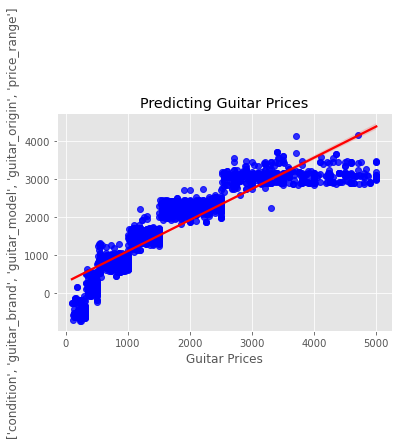

In [822]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.regplot(x='X-Axis', y='Y-Axis', data=df, scatter_kws={"color": "red"}, line_kws={"color": "green"})
p = sns.regplot(y_test,predictions,scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set(title='Predicting Guitar Prices')

plt.xlabel("Guitar Prices")
plt.ylabel(f'{features_in}')

In [823]:
#manually test accuracy
predictions = model.predict(X_test)
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
#df_results['accuracy'] = df_results.Predicted / df_results.Actual if (df_results.Predicted / df_results.Actual)<1.0 else 
df_comparison = pd.merge(df_results,modeling_data, how="inner", left_on="Actual", right_on="price")
df_comparison.columns

Index(['Actual', 'Predicted', 'title', 'price', 'type', 'model',
       'guitar_origin', 'year', 'guitar_brand', 'brand', 'guitar_model',
       'condition', 'price_range', 'body_type'],
      dtype='object')

In [824]:
pred_df = df_comparison[['guitar_model',
               'Predicted', 
               'Actual',
               'brand',
               'condition']]
pd.options.display.float_format = '{:,.2f}'.format
pred_df[pred_df.Actual<5000].value_counts().tail(30)

guitar_model  Predicted  Actual    brand                 condition
Other         1,963.12   1,900.00  Gibson                Good         1
                                   Gretsch               Excellent    1
              1,971.26   1,599.00  Gibson                Excellent    1
                                   Paul Reed Smith       0            1
              1,983.24   1,699.99  Gibson                Excellent    1
                                   Paul Reed Smith       Excellent    1
                                   Yamaha                Mint         1
              1,998.13   1,499.00  Benevente             Very Good    1
                                   ESP LTD               Mint         1
              1,919.97   1,999.99  Parker                Excellent    1
                                   Dean                  Mint         1
                         1,999.00  Mill City Lutherie    Very Good    1
              1,808.59   1,170.98  Jackson               Mint        

In [825]:
# loading library
import pickle

In [826]:
# create an iterator object with write permission - model.pkl
with open('../models/guitar_pkl', 'wb') as files:
    pickle.dump(model, files)

In [827]:
from sklearn.metrics import mean_squared_error
import math

actual = y_test
predicted = predictions

mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

print(f' MSE: {mse} , RMSE: {rmse}')

 MSE: 218508.4699489972 , RMSE: 467.44889554794884


In [828]:

# score fit model on test data
val_score = model.score(X_test, y_test)

# report results
print('\nValidation R^2 score was:', val_score)
print('Feature coefficient results: \n')
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ':', f'{coef:.2f}') 




Validation R^2 score was: 0.8255890296772636
Feature coefficient results: 

price_range : 714.43
condition_Excellent : 138.78
condition_Fair : 96.88
condition_Good : 88.84
condition_Mint : 161.85
condition_Poor : 405.40
condition_Very Good : 123.99
guitar_brand_Aria : 454.46
guitar_brand_B.C. Rich : 133.70
guitar_brand_B3 : 899.16
guitar_brand_BC Rich : 738.62
guitar_brand_Burns : -215.62
guitar_brand_Charvel : -159.25
guitar_brand_Collings : 783.94
guitar_brand_Cort : 305.45
guitar_brand_Danelectro : 135.71
guitar_brand_DeArmond : -198.46
guitar_brand_Dean : 278.61
guitar_brand_DiPinto : -46.00
guitar_brand_Duesenberg : -51.56
guitar_brand_ESP : 91.72
guitar_brand_EVH : -25.66
guitar_brand_Eastman : -54.49
guitar_brand_Eastwood : 54.73
guitar_brand_Electra : 149.80
guitar_brand_Epiphone : 154.11
guitar_brand_Ernie Ball Music Man : -154.78
guitar_brand_Fano : 33.08
guitar_brand_Fender : 75.38
guitar_brand_Framus : -126.08
guitar_brand_G&L : -82.85
guitar_brand_Gibson : 181.37
guitar_b

In [829]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train.values)

# apply the scaler to train set
X_tr = std.transform(X_train.values)

# apply the scaler to test set
X_tr = std.transform(X_test.values) 

In [830]:
# Ridge Regression
from sklearn.linear_model import Ridge
lr_model_ridge = Ridge(alpha = 2) # alpha is regularization strength
lr_model_ridge.fit(X_train,y_train)

Ridge(alpha=2)

In [831]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(f'Adj. R-Squared: {ls.rsquared_adj}')
print(f'R-Squared: {ls.rsquared}')
print(f'Mean Squared Error: {ls.mse_model}')
print(f'Log-likelihood: {ls.llf}')
print(f'The total (weighted) sum of squares centered about the mean: {ls.centered_tss}')
ls.summary()

Adj. R-Squared: 0.8276221150367078
R-Squared: 0.8305446747386132
Mean Squared Error: 60902926.99035445
Log-likelihood: -73463.92718995536
The total (weighted) sum of squares centered about the mean: 12099268418.729038


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     284.2
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:42:22   Log-Likelihood:                -73464.
No. Observations:                9733   AIC:                         1.473e+05
Df Residuals:                    9567   BIC:                         1.485e+05
Df Model:                         165                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -1521.2270    285.015     -5.337      0.000   -2079.917    -962.537
price_range                           714.4282      4.749    150.448      0.000     705.120     723.737
condition_Excellent                   138.7827     46.627      2.976      0.003      47.385     230.181
condition_Fair                         96.8846     72.655      1.333      0.182     -45.535     239.304
condition_Good                         88.8449     49.452      1.797      0.072      -8.092     185.782
condition_Mint                        161.8541     47.079      3.438      0.001      69.569     254.139
condition_Poor                        405.4019    466.008      0.870      0.384    -508.073    1318.877
condition_Very Good                   123.9874     46.944      2.641      0.008      31.967     216.008
guitar_brand_Aria                     454.4592    378.108      1.202      0.229    -286.713    1195.632
guitar_brand_B.C. Rich                133.6996    286.687      0.466      0.641    -428.267     695.666
guitar_brand_B3                       899.1628    353.878      2.541      0.011     205.487    1592.838
guitar_brand_BC Rich                  738.6235    378.266      1.953      0.051      -2.859    1480.106
guitar_brand_Burns                   -215.6231    378.423     -0.570      0.569    -957.412     526.166
guitar_brand_Charvel                 -159.2518    275.012     -0.579      0.563    -698.335     379.831
guitar_brand_Collings                 783.9443    286.840      2.733      0.006     221.678    1346.211
guitar_brand_Cort                     305.4514    338.301      0.903      0.367    -357.690     968.592
guitar_brand_Danelectro               135.7141    378.212      0.359      0.720    -605.662     877.091
guitar_brand_DeArmond                -198.4626    422.608     -0.470      0.639   -1026.864     629.938
guitar_brand_Dean                     278.6132    275.110      1.013      0.311    -260.661     817.887
guitar_brand_DiPinto                  -45.9985    353.818     -0.130      0.897    -739.557     647.560
guitar_brand_Duesenberg               -51.5610    283.301     -0.182      0.856    -606.891     503.769
guitar_brand_ESP                       91.7243    269.420      0.340      0.734    -436.397     619.845
guitar_brand_EVH                      -25.6616    277.560     -0.092      0.926    -569.739     518.416
guitar_brand_Eastman                  -54.4863    301.581     -0.181      0.857    -645.650     536.677
guitar_brand_Eastwood                  54.7333    299.056      0.183      0.855    -531.480     640.947
guitar_brand_Electra                  149.8011    422.934      0.354      0.723    -679.239     978.841
guitar_brand_Epiphone                 154.1135    268.649      0.57

In [842]:
def runModel_compare(df,features_in):
    X = df[features_in] 
    X = pd.get_dummies(data=X, drop_first=True)
    Y = df['price']

    #from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

    #from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train,y_train)

    # print the intercept
    # print(model.intercept_)

    coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
    #coeff_parameter

    predictions = model.predict(X_test)
    #predictions

    ## plotting the data
    #sns.regplot(x='X-Axis', y='Y-Axis', data=df, scatter_kws={"color": "red"}, line_kws={"color": "green"})
    p = sns.regplot(y_test,predictions,scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set(title=f'Model using {features_in}')

    plt.xlabel("Guitar Prices")
    plt.ylabel(f'Features')
    

    #from sklearn.metrics import mean_squared_error
    #import math

    actual = y_test
    predicted = predictions

    mse = mean_squared_error(actual, predicted)
    rmse = math.sqrt(mse)

    model.fit(X_train,y_train)
    
    print('--- Scores: ---')
    print(f'Model Score: {model.score(X_train,y_train)}')
    print(f'MSE: {mse} \nRMSE: {rmse}')
    
    X_train_Sm= sm.add_constant(X_train)
    X_train_Sm= sm.add_constant(X_train)
    ls=sm.GLS(y_train,X_train_Sm).fit()
    print(f'Adj. R-Squared: {ls.rsquared_adj}')
    print(f'R-Squared: {ls.rsquared}')
    #print(f'Mean Squared Error: {ls.mse_model}')
    print(f'Log-likelihood: {ls.llf}')    
    print('')
    print('--- Comparison ---')
    #manually test accuracy
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    #df_results['accuracy'] = df_results.Predicted / df_results.Actual if (df_results.Predicted / df_results.Actual)<1.0 else 
    df_comparison = pd.merge(df_results,modeling_data, how="inner", left_on="Actual", right_on="price")
    #df_comparison.columns

    pred_df = df_comparison[['model',
                   'Predicted', 
                   'Actual',
                   'year',
                   'brand',
                   'condition']]
    pd.options.display.float_format = '{:,.2f}'.format
    compare_vals = pred_df[pred_df.Actual<2500].value_counts().head(20)
    print(compare_vals)
    print('--- Regression Plot --- ')
    
    # save the model to disk
    # create an iterator object with write permission - model.pkl
    with open('../models/model_pkl', 'wb') as files:
        pickle.dump(model, files)

--- Scores: ---
Model Score: 0.8305446747386132
MSE: 218508.4699489972 
RMSE: 467.44889554794884
Adj. R-Squared: 0.8276221150367079
R-Squared: 0.8305446747386133
Log-likelihood: -73463.92718995537

--- Comparison ---
model                                                                      Predicted  Actual    year  brand            condition
Les Paul Classic                                                           2,037.46   1,999.00  2021  Gibson           Excellent    45
Player Telecaster with Maple Fretboard                                     774.25     675.00    2020  Fender           Mint         45
X Series SL1X Soloist                                                      1,016.82   699.98    2021  Jackson          Mint         40
E-II Eclipse                                                               2,249.48   1,595.00  2017  ESP              Very Good    36
Player Stratocaster with Maple Fretboard                                   898.26     799.99    2021  Fender      

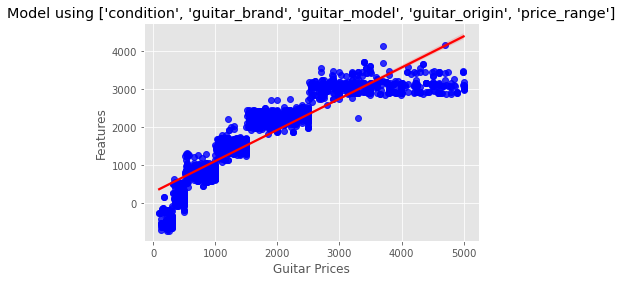

In [843]:
runModel_compare(modeling_data,features_in)